In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 
import pymc3 as pm
import arviz as az

import pandas as pd

import seaborn as sns

from skimage import io
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Some code from lab sheets

In [43]:
data = fetch_california_housing(as_frame = True)
X = data["data"]
y = data["target"]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#y_std = scaler.fit_transform(y)
data.frame.info()
data.frame.describe()
data.frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

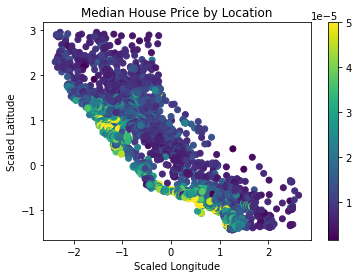

In [41]:


# Extract the columns for longitude, latitude, and median house price
longitude = X["Longitude"].values.reshape(-1, 1)
latitude = X["Latitude"].values.reshape(-1, 1)
median_house_price = y / 100000

# Scale the longitude and latitude values using StandardScaler
scaler = StandardScaler()
scaled_longitude = scaler.fit_transform(longitude)
scaled_latitude = scaler.fit_transform(latitude)

# Create a scatter plot with longitude on the x-axis and latitude on the y-axis
plt.scatter(scaled_longitude, scaled_latitude, c=median_house_price, cmap="viridis")

# Add a color bar to the plot
plt.colorbar()

# Add axis labels and a title to the plot
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.title("Median House Price by Location")

# Adjust the aspect ratio of the plot
plt.gca().set_aspect("auto")

# Show the plot
plt.show()


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

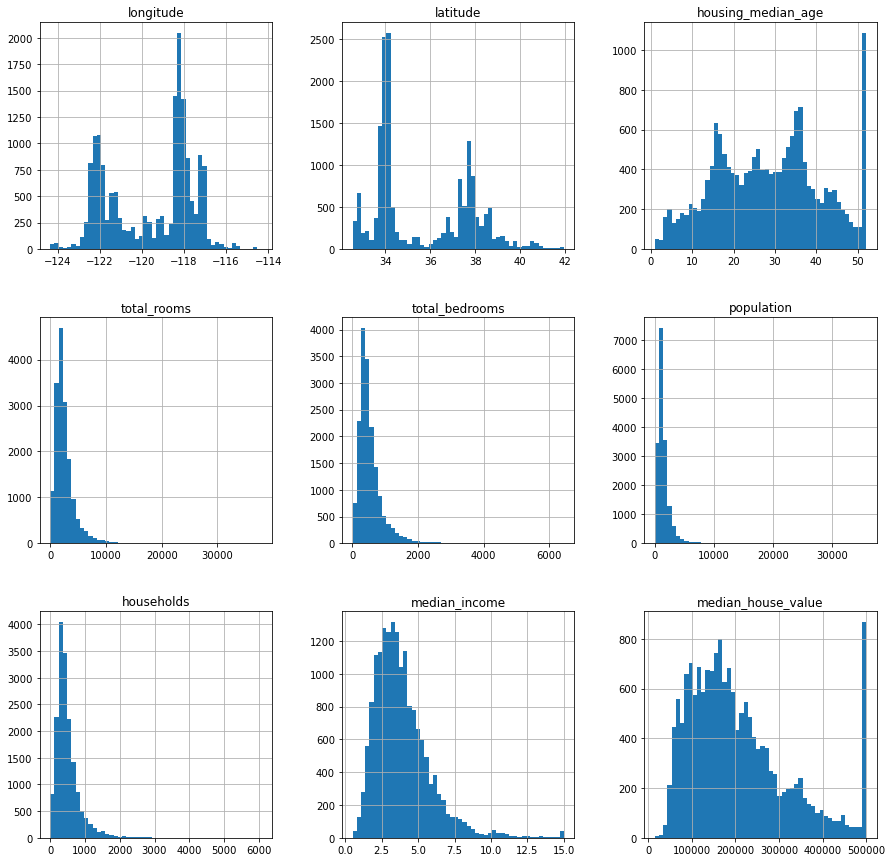

In [28]:
df.hist(bins=50, figsize=(15, 15))

In [4]:
num_samples = 20648
with pm.Model() as model:
    # Define priors for the model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=20)
    beta = pm.Normal("beta", mu=0, sigma=20, shape=X_std.shape[1])
    sigma = pm.HalfNormal("sigma")
    
    # Define the linear model
    mu = alpha + pm.math.dot(X_std, beta)
    
    # Define the likelihood function
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Use PyMC to perform Markov Chain Monte Carlo (MCMC) sampling
    trace1 = pm.sample(num_samples, pm.NUTS(), progressbar=True, cores=2, chains=2)

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_70811/2995626168.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace1 = pm.sample(num_samples, pm.NUTS(), progressbar=True, cores=2, chains=2)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 20_648 draw iterations (2_000 + 41_296 draws total) took 281 seconds.


In [5]:
# Use the trace to make inferences about the model
az.summary(trace1, round_to=2)

/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.07,0.01,2.06,2.08,0.0,0.0,38601.83,28591.78,1.0
beta[0],0.83,0.01,0.81,0.84,0.0,0.0,25131.84,28377.33,1.0
beta[1],0.12,0.01,0.11,0.13,0.0,0.0,38276.16,30713.27,1.0
beta[2],-0.27,0.01,-0.29,-0.24,0.0,0.0,22635.63,24428.46,1.0
beta[3],0.31,0.01,0.28,0.33,0.0,0.0,23717.93,26584.85,1.0
beta[4],-0.00,0.01,-0.01,0.01,0.0,0.0,41254.64,29381.50,1.0
beta[5],-0.04,0.01,-0.05,-0.03,0.0,0.0,39441.09,28549.91,1.0
beta[6],-0.90,0.02,-0.93,-0.87,0.0,0.0,26295.22,27131.91,1.0
beta[7],-0.87,0.02,-0.90,-0.84,0.0,0.0,26978.98,27539.06,1.0
sigma,0.72,0.00,0.72,0.73,0.0,0.0,48844.49,29091.28,1.0


/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

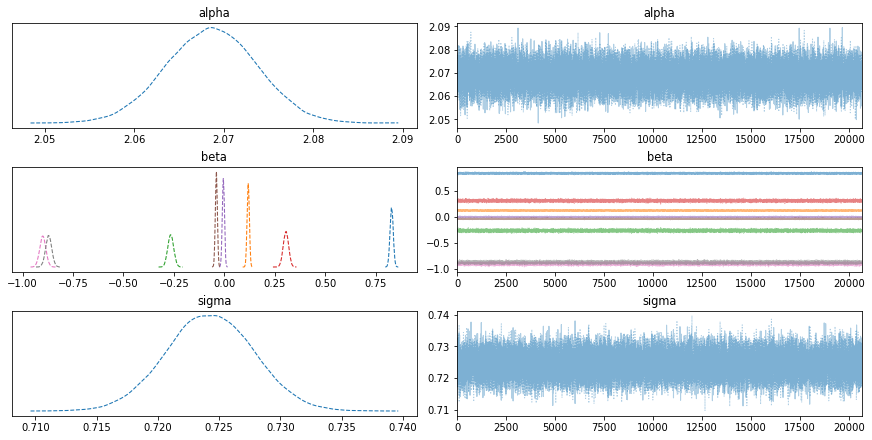

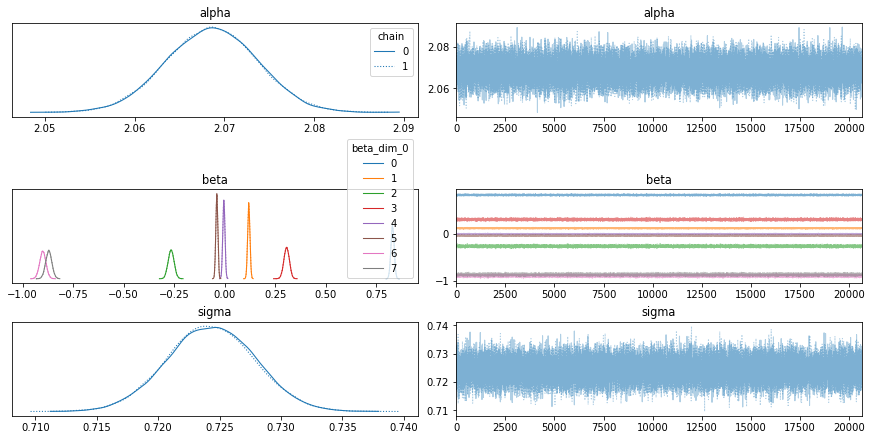

In [7]:
az.plot_trace(trace1, combined=True)
az.plot_trace(trace1,legend=True)

In [8]:
num_samples = 500
with pm.Model() as model:
    # Define priors for the model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=20)
    beta = pm.Normal("beta", mu=0, sigma=20, shape=X_std.shape[1])
    sigma = pm.HalfNormal("sigma")
    
    # Define the linear model
    mu = alpha + pm.math.dot(X_std, beta)
    
    # Define the likelihood function
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Use PyMC to perform Markov Chain Monte Carlo (MCMC) sampling
    trace2 = pm.sample(num_samples, pm.NUTS(), progressbar=True, cores=2, chains=2)

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_70811/3147331720.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace2 = pm.sample(num_samples, pm.NUTS(), progressbar=True, cores=2, chains=2)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 32 seconds.


In [9]:
az.summary(trace2, round_to=2)

/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.07,0.01,2.06,2.08,0.0,0.0,974.10,650.95,1.01
beta[0],0.83,0.01,0.81,0.84,0.0,0.0,524.76,685.18,1.00
beta[1],0.12,0.01,0.11,0.13,0.0,0.0,849.05,817.41,1.01
beta[2],-0.27,0.01,-0.29,-0.24,0.0,0.0,499.53,670.99,1.00
beta[3],0.31,0.01,0.28,0.33,0.0,0.0,570.02,622.07,1.00
beta[4],-0.00,0.01,-0.02,0.01,0.0,0.0,893.83,509.21,1.00
beta[5],-0.04,0.01,-0.05,-0.03,0.0,0.0,1169.59,702.96,1.00
beta[6],-0.90,0.02,-0.93,-0.87,0.0,0.0,613.89,698.75,1.00
beta[7],-0.87,0.02,-0.90,-0.84,0.0,0.0,615.92,609.22,1.00
sigma,0.72,0.00,0.72,0.73,0.0,0.0,1021.73,665.92,1.00


/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

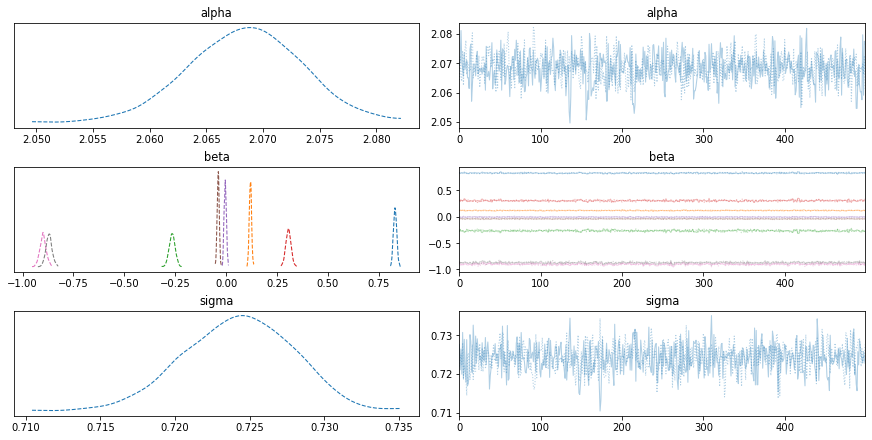

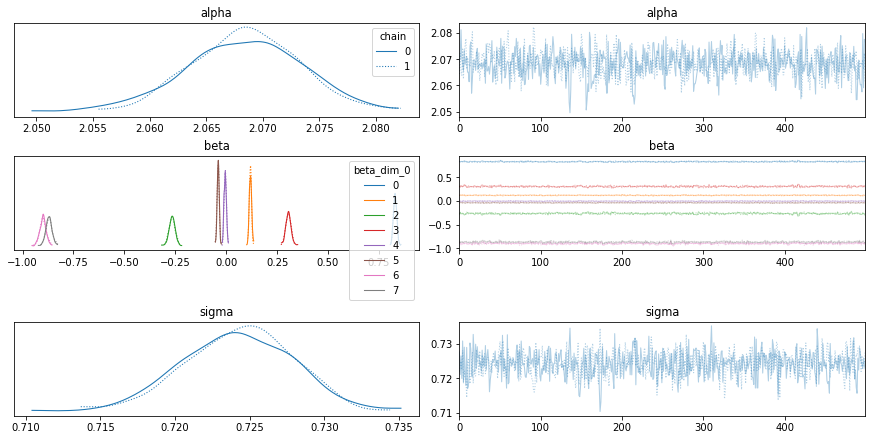

In [10]:
az.plot_trace(trace2, combined=True)
az.plot_trace(trace2,legend=True)

In [11]:
num_samples = 50
with pm.Model() as model:
    # Define priors for the model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=20)
    beta = pm.Normal("beta", mu=0, sigma=20, shape=X_std.shape[1])
    sigma = pm.HalfNormal("sigma")
    
    # Define the linear model
    mu = alpha + pm.math.dot(X_std, beta)
    
    # Define the likelihood function
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Use PyMC to perform Markov Chain Monte Carlo (MCMC) sampling
    trace3 = pm.sample(num_samples, pm.NUTS(), progressbar=True, cores=2, chains=2)

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_70811/868827992.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace3 = pm.sample(num_samples, pm.NUTS(), progressbar=True, cores=2, chains=2)
Only 50 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 50 draw iterations (2_000 + 100 draws total) took 23 seconds.
/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/pymc3/sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


In [12]:
az.summary(trace3, round_to=2)

/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.07,0.00,2.06,2.08,0.0,0.0,112.04,80.52,1.02
beta[0],0.83,0.01,0.82,0.84,0.0,0.0,92.37,72.70,1.01
beta[1],0.12,0.00,0.11,0.13,0.0,0.0,110.16,80.08,1.03
beta[2],-0.27,0.01,-0.29,-0.24,0.0,0.0,85.28,116.62,1.01
beta[3],0.31,0.01,0.28,0.32,0.0,0.0,85.10,78.41,1.01
beta[4],-0.00,0.00,-0.01,0.00,0.0,0.0,200.00,77.53,0.98
beta[5],-0.04,0.00,-0.05,-0.03,0.0,0.0,93.53,55.82,1.04
beta[6],-0.90,0.01,-0.93,-0.88,0.0,0.0,108.98,87.22,1.00
beta[7],-0.87,0.01,-0.89,-0.85,0.0,0.0,103.29,114.72,1.02
sigma,0.72,0.00,0.72,0.73,0.0,0.0,197.27,110.85,1.01


/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/emiljino/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

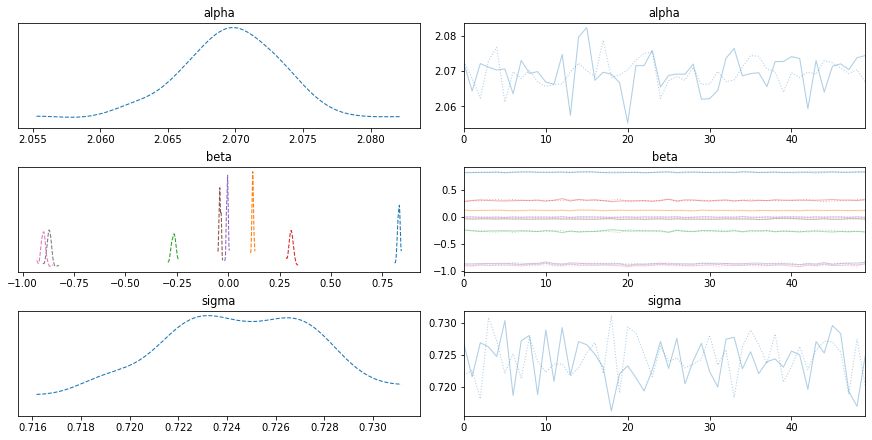

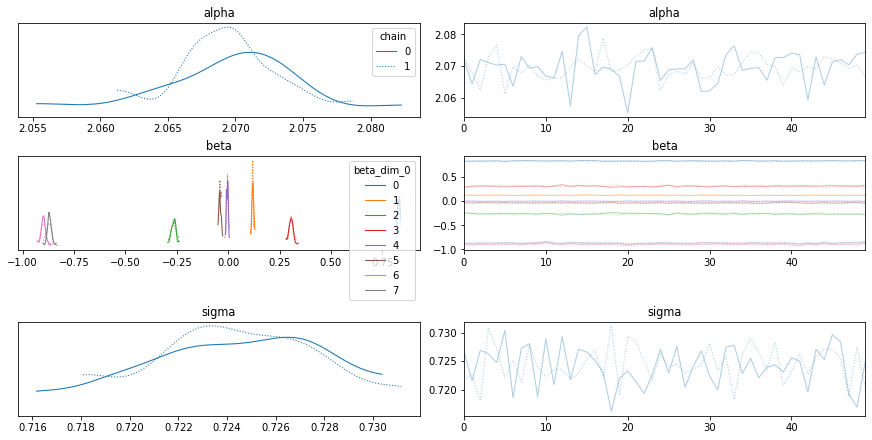

In [13]:
az.plot_trace(trace3, combined=True)
az.plot_trace(trace3,legend=True)